### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil
import numpy as np

# Local imports
import analysis_functions

# Apply better style
analysis_functions.apply_heatmap_style()


### Plot tune scan

In [2]:
# Define study
STUDY_NAME = "xing_nb_scan_round_150_1500_higher_chroma_pos_oct"
COLLIDER = "base_collider"
PARQUET_PATH = f"../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config_final.yaml"

# Load dataframe
df = pd.read_parquet(f"../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

df


name base collider  \
beam  i_oct_b1 i_oct_b2 dqx  dqy  qx     qy    num_particles_per_bunch n_emitt_x n_emitt_y crossing_angle                      
lhcb1 60.0     60.0     15.0 15.0 62.315 60.32 8.000000e+10            2.5       2.5       120.0               base_collider   
                                                                                           130.0               base_collider   
                                                                                           140.0               base_collider   
                                                                                           150.0               base_collider   
                                                                                           160.0               base_collider   
...                                                                                                                      ...   
                                               1.600000e+11            2.5       2.5       230.0               base_collider   
                                                                                           240.0               base_collider   
                                                                                           250.0               base_collider   
                                                                                           260.0               base_collider   
                                                                                           270.0               base_collider   

                                                                                                           normalized amplitude in xy-plane  \
beam  i_oct_b1 i_oct_b2 dqx  dqy  qx     qy    num_particles_per_bunch n_emitt_x n_emitt_y crossing_angle                                     
lhcb1 60.0     60.0     15.0 15.0 62.315 60.32 8.000000e+10            2.5       2.5       120.0                                      2.759   
                                                                                           130.0                                      3.034   
                                                                                           140.0                                      3.724   
                                                                                           150.0                                      4.069   
                                                                                           160.0                                      4.414   
...                                                                                                                                     ...   
                                               1.600000e+11            2.5       2.5       230.0                                      4.345   
                                                                                           240.0                                      5.034   
                                                                                           250.0                                      4.966   
                                                                                           260.0                                      5.172   
                                                                                           270.0                                      5.103   

                                                                                                               qx  \
beam  i_oct_b1 i_oct_b2 dqx  dqy  qx     qy    num_particles_per_bunch n_emitt_x n_emitt_y crossing_angle           
lhcb1 60.0     60.0     15.0 15.0 62.315 60.32 8.000000e+10            2.5       2.5       120.0           62.315   
                                                                                           130.0           62.315   
                                                                                           140.0           62.315

In [3]:
# Reshape for plotting
df_to_plot = df.pivot(index="num_particles_per_bunch", columns="crossing_angle", values="normalized amplitude in xy-plane")
df_to_plot

crossing_angle,120.0,130.0,140.0,150.0,160.0,170.0,180.0,190.0,200.0,210.0,220.0,230.0,240.0,250.0,260.0,270.0
num_particles_per_bunch,,,,,,,,,,,,,,,,
8.000000e+10,2.759,3.034,3.724,4.069,4.414,4.414,4.828,5.310,5.310,5.310,5.655,6.276,6.207,6.690,6.552,6.759
8.500000e+10,2.552,2.828,3.310,4.000,4.276,4.828,5.172,5.241,5.241,5.517,5.862,6.276,6.207,6.552,6.552,6.690
9.000000e+10,2.414,2.759,3.241,3.448,4.069,4.621,4.828,5.172,5.241,5.379,5.724,6.069,6.069,6.345,6.759,6.690
9.500000e+10,2.345,2.897,3.310,3.310,4.000,4.414,4.897,5.103,5.379,5.517,5.793,5.931,5.655,6.276,6.483,6.759
1.000000e+11,2.000,2.759,2.897,3.448,3.448,4.207,4.621,4.966,5.310,5.517,5.793,5.793,6.000,5.793,6.483,6.414
1.050000e+11,2.000,2.552,2.828,3.310,3.724,4.000,4.690,4.966,5.034,5.241,5.586,5.586,5.448,5.724,5.931,6.276
1.100000e+11,2.000,2.414,2.897,3.034,3.517,3.586,4.276,4.759,5.034,5.034,5.172,5.655,5.724,5.517,5.724,6.000
1.150000e+11,2.000,2.138,2.759,2.897,3.310,3.724,4.138,4.621,4.897,5.103,5.172,5.517,5.448,5.379,5.862,5.655
1.200000e+11,2.000,2.069,2.690,2.966,3.310,3.379,3.862,4.207,4.483,4.897,4.966,5.241,5.103,4.966,5.172,5.448


In [4]:
df_for_levels = df.pivot(index="num_particles_per_bunch", columns="crossing_angle", values="lumi_ip_1_5")
df_for_levels

crossing_angle,120.0,130.0,140.0,150.0,160.0,170.0,180.0,190.0,200.0,210.0,220.0,230.0,240.0,250.0,260.0,270.0
num_particles_per_bunch,,,,,,,,,,,,,,,,
8.000000e+10,3.380891e+34,3.349045e+34,3.339365e+34,3.338198e+34,3.340431e+34,3.343953e+34,3.347835e+34,3.340450e+34,3.312617e+34,3.265713e+34,3.201973e+34,3.124203e+34,3.035473e+34,2.938864e+34,2.837248e+34,2.733155e+34
8.500000e+10,3.891034e+34,3.829266e+34,3.805835e+34,3.798071e+34,3.797063e+34,3.799018e+34,3.802205e+34,3.792927e+34,3.760646e+34,3.706843e+34,3.634014e+34,3.545320e+34,3.444244e+34,3.334276e+34,3.218676e+34,3.100313e+34
9.000000e+10,4.463971e+34,4.362779e+34,4.319592e+34,4.301735e+34,4.295378e+34,4.294423e+34,4.296014e+34,4.284008e+34,4.246355e+34,4.184611e+34,4.101534e+34,4.000665e+34,3.885920e+34,3.761233e+34,3.630279e+34,3.496294e+34
9.500000e+10,5.093319e+34,4.945701e+34,4.876950e+34,4.845417e+34,4.831532e+34,4.826297e+34,4.825392e+34,4.809858e+34,4.765983e+34,4.695363e+34,4.601015e+34,4.486871e+34,4.357303e+34,4.216712e+34,4.069212e+34,3.918421e+34
1.000000e+11,5.774212e+34,5.575961e+34,5.475986e+34,5.426980e+34,5.403221e+34,5.392239e+34,5.387890e+34,5.368016e+34,5.317096e+34,5.236725e+34,5.130164e+34,5.001743e+34,4.856303e+34,4.698734e+34,4.533606e+34,4.364938e+34
1.050000e+11,6.502494e+34,6.252775e+34,6.116148e+34,6.045570e+34,6.009325e+34,5.990959e+34,5.982122e+34,5.957039e+34,5.898236e+34,5.807252e+34,5.687572e+34,5.543921e+34,5.381622e+34,5.206065e+34,5.022296e+34,4.834750e+34
1.100000e+11,7.273721e+34,6.975945e+34,6.797785e+34,6.701221e+34,6.649553e+34,6.621941e+34,6.607425e+34,6.576173e+34,6.508601e+34,6.406124e+34,6.272421e+34,6.112604e+34,5.932485e+34,5.737965e+34,5.534579e+34,5.327191e+34
1.150000e+11,7.827174e+34,7.745231e+34,7.521735e+34,7.394548e+34,7.324163e+34,7.285175e+34,7.263613e+34,7.225110e+34,7.147808e+34,7.032914e+34,6.884262e+34,6.707339e+34,6.508444e+34,6.294001e+34,6.070039e+34,5.841867e+34
1.200000e+11,8.340495e+34,8.559857e+34,8.289010e+34,8.126523e+34,8.033778e+34,7.980988e+34,7.950808e+34,7.903828e+34,7.815738e+34,7.687444e+34,7.522883e+34,7.327894e+34,7.109260e+34,6.873929e+34,6.628439e+34,6.378545e+34


In [5]:
array_xing = np.linspace(120, 270, 16, endpoint=True)
df_to_plot.columns = [str(xing) for xing in array_xing]
df_to_plot.index /= 1e11 

df_for_levels.columns = [str(xing) for xing in array_xing]
df_for_levels.index /= 1e11

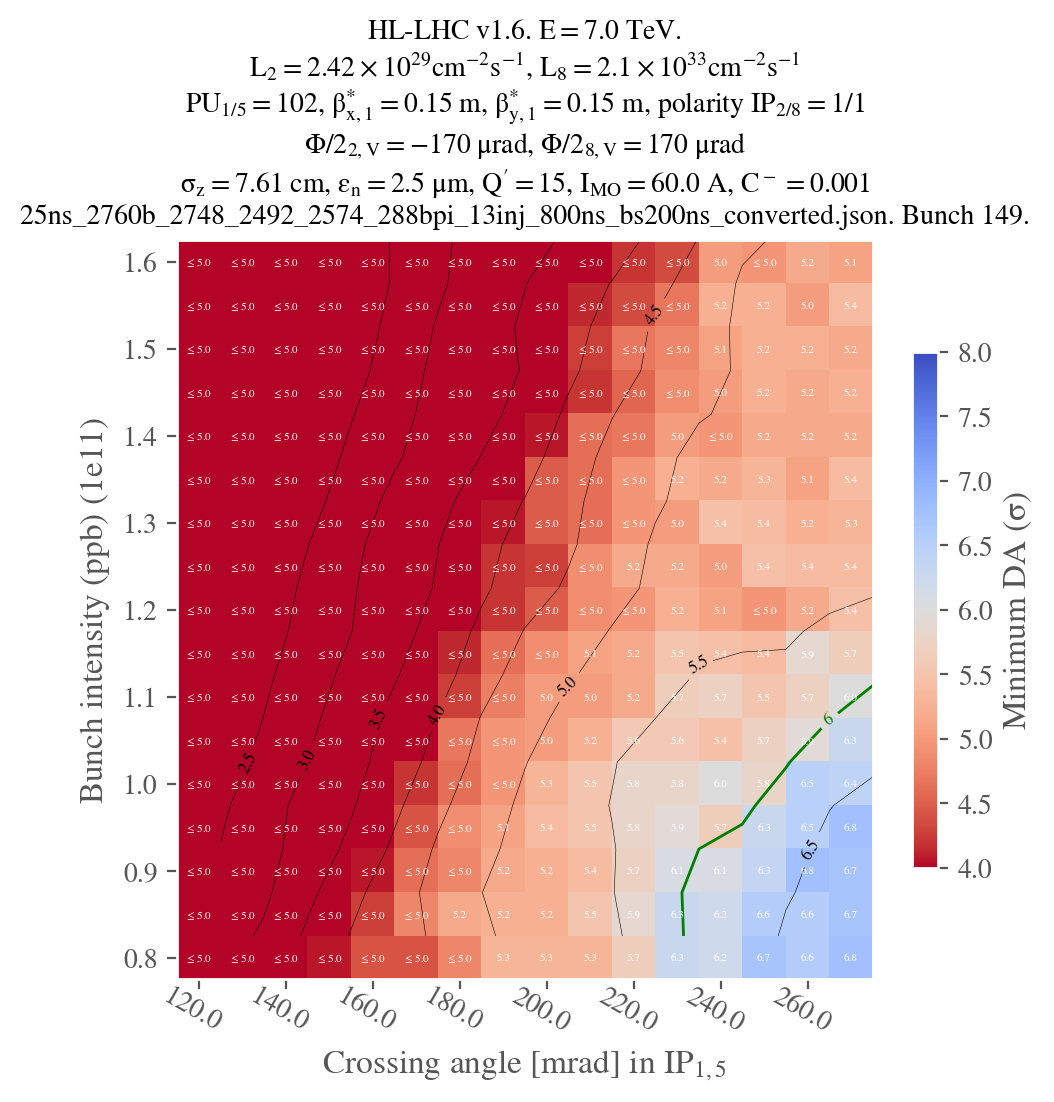

In [6]:
# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot,
    f'{STUDY_NAME}_{COLLIDER}',
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    betx=0.15,
    bety=0.15,
    Nb=False,
    symmetric=False,
    mask_lower_triangle=False,
    green_contour=6.,
    extended_diagonal=False,
    plot_diagonal_lines=False,
    xaxis_ticks_on_top=False,
    display_intensity=True,
    display_xing = False,
    ignore_lumi_1_5 = True,
    vmin=4.,
    vmax=8.0,
    CC = False,
    xlabel = r"Crossing angle [mrad] in IP$_{1,5}$",
    ylabel = r"Bunch intensity (ppb) $(1e11)$",
)
# ! Verified


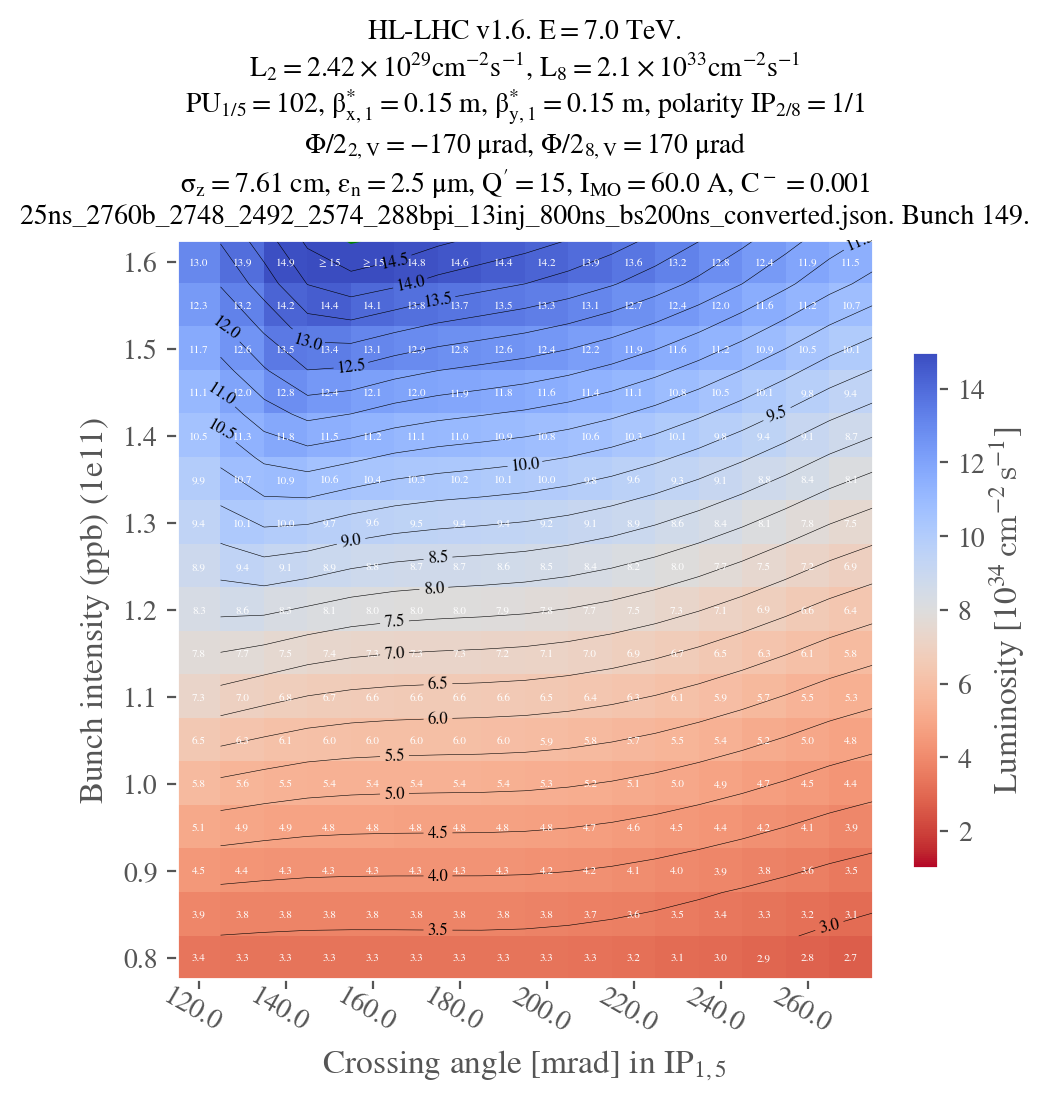

In [7]:
# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)["config_mad"]
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
df_for_levels /= 1e34
analysis_functions.plot_heatmap(
    df_for_levels,
    f"{STUDY_NAME}_{COLLIDER}_isolumi",
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    betx=0.15,
    bety=0.15,
    Nb=False,
    symmetric=False,
    mask_lower_triangle=False,
    green_contour=15.0,
    extended_diagonal=False,
    plot_diagonal_lines=False,
    xaxis_ticks_on_top=False,
    display_intensity=True,
    display_xing=False,
    ignore_lumi_1_5=True,
    vmin=1,
    vmax=15,
    CC=False,
    xlabel=r"Crossing angle [mrad] in IP$_{1,5}$",
    ylabel=r"Bunch intensity (ppb) $(1e11)$",
    label_cbar=r"Luminosity [$10^{34} \, \mathrm{cm}^{-2} \, \mathrm{s}^{-1}$]",
)